#  **Практическое занятие №4. Метод градиентного спуска.**

In [2]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

## Простые примеры

### Одномерный случай


Функция:
$y = f(x) = x^2$

Производная: $f'(x)= 2x$

Начальное приближение: $x_0 =1.6$

Размер шага: $\gamma = 0.2$

Шаг градиентного спуска:
$x_{i+1} = x_i - \gamma 2x_i$


In [4]:
def func(x):
    # YOUR CODE HERE
    return x ** 2

def grad(x):
    # YOUR CODE HERE
    return 2 * x

def step(x, lr):
    # YOUR CODE HERE
    return x - lr * grad(x)

In [7]:
lr = 0.2
x_hist = [1.6]

for i in range(20):
    x_curr = x_hist[-1]
    x_next = step(x_curr, lr)
    x_hist.append(x_next)

# YOUR CODE HERE
x_hist = np.array(x_hist)
y_hist = func(x_hist)

In [8]:
x_hist

array([1.60000000e+00, 9.60000000e-01, 5.76000000e-01, 3.45600000e-01,
       2.07360000e-01, 1.24416000e-01, 7.46496000e-02, 4.47897600e-02,
       2.68738560e-02, 1.61243136e-02, 9.67458816e-03, 5.80475290e-03,
       3.48285174e-03, 2.08971104e-03, 1.25382663e-03, 7.52295975e-04,
       4.51377585e-04, 2.70826551e-04, 1.62495931e-04, 9.74975584e-05,
       5.84985350e-05])

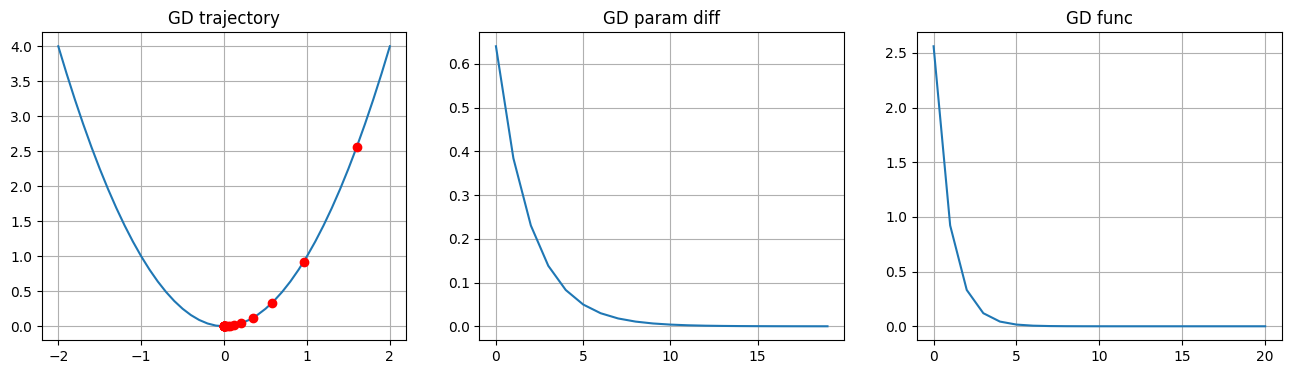

In [9]:
plt.figure(figsize=(16,4))


plt.subplot(1, 3, 1)
plt.title('GD trajectory')

x_grid = np.arange(-2, 2.1, 0.1)
y_grid = func(x_grid)
plt.plot(x_grid, y_grid)

plt.scatter(x_hist, y_hist, c='r', zorder=10)

plt.grid()


plt.subplot(1, 3, 2)
plt.title('GD param diff')

diff = np.abs(np.diff(x_hist))
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 3, 3)
plt.title('GD func')

plt.plot(np.arange(len(y_hist)), y_hist)

plt.grid()


plt.show()

### Двумерный случай


Функция:
$z = f(x_1, x_2)\ =x_1^2 + x_2^2$


Градиент: $\nabla f(x_1, x_2) = (2x_1, 2x_2)$

Начальное приближение: $(x_0, y_0) = (0.8, 0.8)$

Размер шага: $\gamma = 0.1$

Шаг градиентного спуска:
$(x^{i+1}, y^{i+1}) = (x^i, y^i) - \gamma(2x^i, 2y^i)$

In [10]:
def func(x):
    # YOUR CODE HERE
    return np.sum(x ** 2)

def grad(x):
    # YOUR CODE HERE
    return 2 * x

def step(x, lr):
    # YOUR CODE HERE
    return x - lr * grad(x)

In [11]:
lr = 0.1
x_hist = [np.array([0.8, 0.8])]

for i in range(20):
    x_curr = x_hist[-1]
    x_next = step(x_curr, lr)
    x_hist.append(x_next)

# YOUR CODE HERE
x_hist = np.array(x_hist)
y_hist = [func(x) for x in x_hist]

In [12]:
def make_levels(grid, func, num_levels=50):
    X, Y = np.meshgrid(grid, grid)
    Z = np.empty_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func(np.array([X[i, j], Y[i, j]]))
    levels = np.geomspace(np.min(Z), np.max(Z), num=num_levels)
    return X, Y, Z, levels

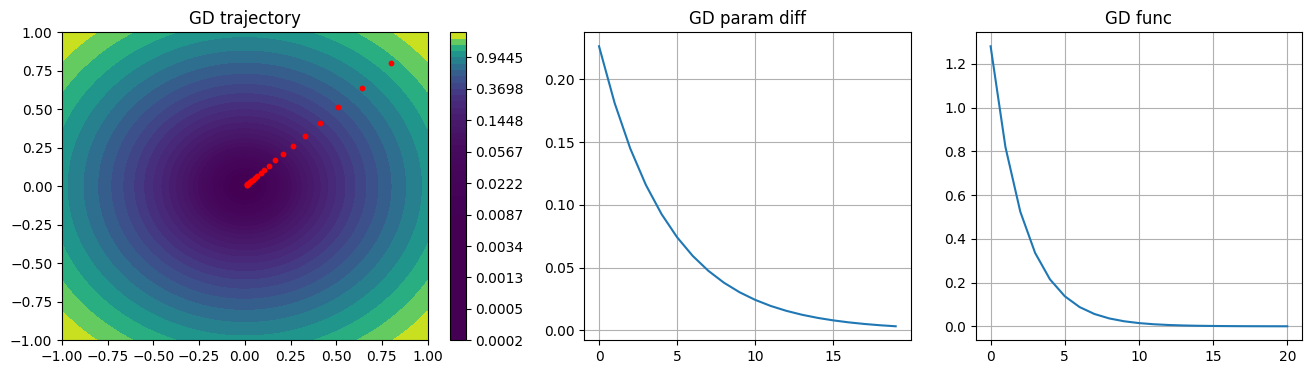

In [17]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-1, 1, 100), func))
plt.colorbar()

plt.scatter(x_hist[:,0], x_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(x_hist[1:] - x_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD func')

plt.plot(np.arange(len(y_hist)), y_hist)

plt.grid()


plt.subplots_adjust(wspace=1)
plt.show()

## Линейная регрессия

### Вспомним лекцию

Модель:
$$
f(X) = X w
$$

Лосс:
$$
L(w, X, y) = MSE(y, X w) =  \|y - X w\|^2_2 = \sum_i (y_i - \langle X_i, w \rangle)^2
$$

Градиент:
$$
\nabla L(w) = 2X^T(X w - y)
$$

Шаг градиентного спуска:
$$
w^{i+1} = w^i - \gamma \nabla L(w^i)
$$

**Задача:** доказать, что формула градиента верна.

Действительно, пусть $v = 2 X^T (X w - y)$, тогда:

$$
\nabla L_j(w) = \sum_i 2 (y_i - \langle X_i, w \rangle) (- X_{i,j}) = 2 \sum_i X_{i,j} (\langle X_i, w \rangle - y_i)
$$

$$
v_j = 2 \langle X_{*,j}, Xw - y \rangle = 2 \sum_i X_{i,j} (\langle X_i, w \rangle - y_i) = \nabla L_j(w)
$$

### Сгенерируем датасет

In [18]:
n_features = 2
n_objects = 500

np.random.seed(10)

X = np.random.uniform(-10, 10, (n_objects, n_features))

w = np.random.randn(n_features)

y = X @ w + np.random.randn(n_objects)

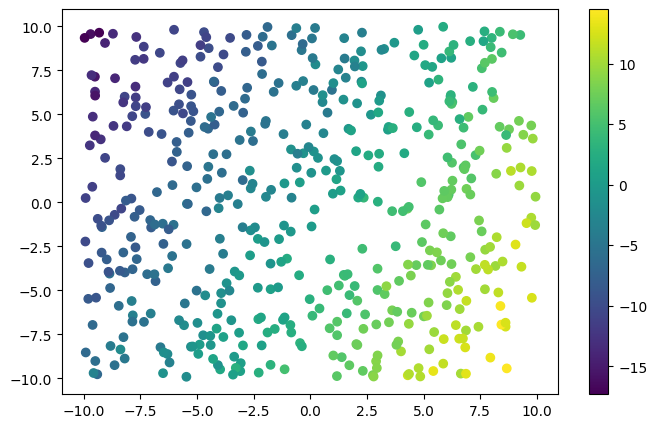

In [19]:
plt.figure(figsize=(8, 5))

plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

plt.show()

### Реализуем градиентный спуск

In [20]:
def loss(w, X, y):
    # YOUR CODE HERE
    return np.sum((y - X @ w) ** 2)

def grad(w, X, y):
    # YOUR CODE HERE
    return 2 * X.T @ (X @ w - y)

def step(w, X, y, lr):
    # YOUR CODE HERE
    return w - lr * grad(w, X, y)

In [37]:
lr = 1e-5
w_hist = [np.zeros(n_features)]
l_hist = [loss(w_hist[-1], X, y)]

for i in range(20):
    w_hist.append(step(w_hist[-1], X, y, lr))
    l_hist.append(loss(w_hist[-1], X, y))

w_hist = np.array(w_hist)

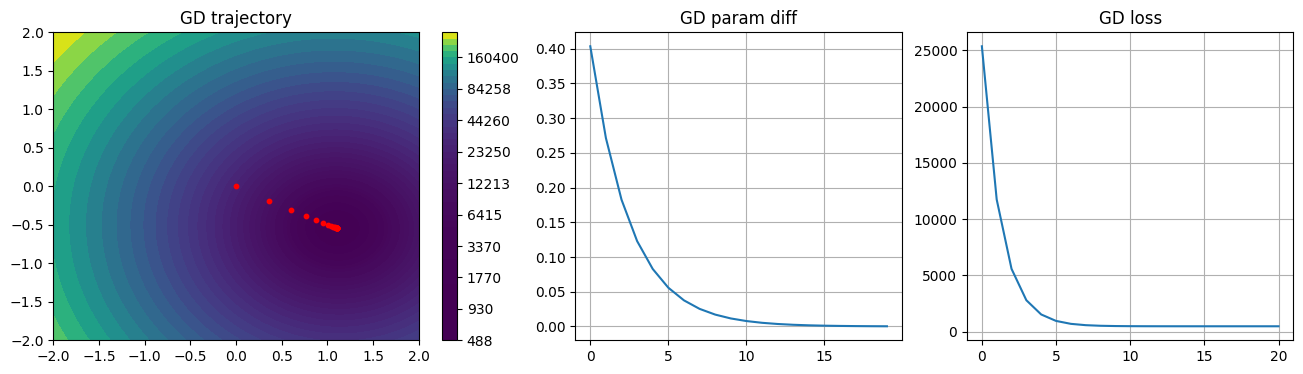

In [38]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-2, 2), lambda w: loss(w, X, y)))
plt.colorbar()

plt.scatter(w_hist[:,0], w_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(w_hist[1:] - w_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD loss')

plt.plot(np.arange(len(l_hist)), l_hist)

plt.grid()

plt.subplots_adjust(wspace=1)
plt.show()

### Добавим динамический learning_rate

In [31]:
lr = 1e-4

w_hist = [np.zeros(n_features)]
l_hist = [loss(w_hist[-1], X, y)]

for i in range(20):
    w_hist.append(step(w_hist[-1], X, y, lr))
    l_hist.append(loss(w_hist[-1], X, y))
    # update lr
    if l_hist[-1] > l_hist[-2]:
        lr = lr / 10

w_hist = np.array(w_hist)

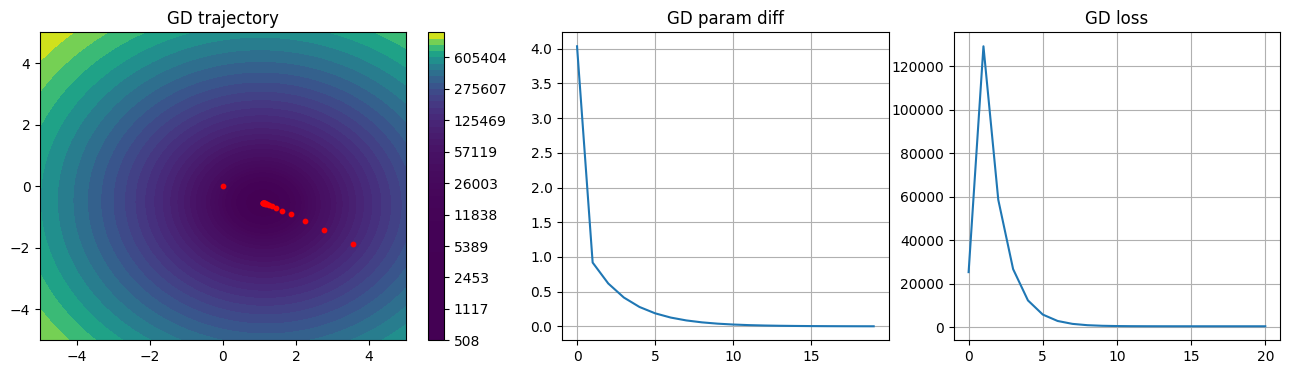

In [32]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-5, 5), lambda w: loss(w, X, y)))
plt.colorbar()

plt.scatter(w_hist[:,0], w_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(w_hist[1:] - w_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD loss')

plt.plot(np.arange(len(l_hist)), l_hist)

plt.grid()

plt.subplots_adjust(wspace=1)
plt.show()

### Реализуем SGD

In [34]:
lr = 5 * 1e-4
chunk_size = 5

w_hist = [np.zeros(n_features)]
l_hist = [loss(w_hist[-1], X, y)]

for i in range(20):
    ind = np.random.randint(0, high=len(X), size=chunk_size)
    X_chunk = X[ind,:]
    y_chunk = y[ind]
    w_hist.append(step(w_hist[-1], X_chunk, y_chunk, lr))
    l_hist.append(loss(w_hist[-1], X_chunk, y_chunk))

w_hist = np.array(w_hist)

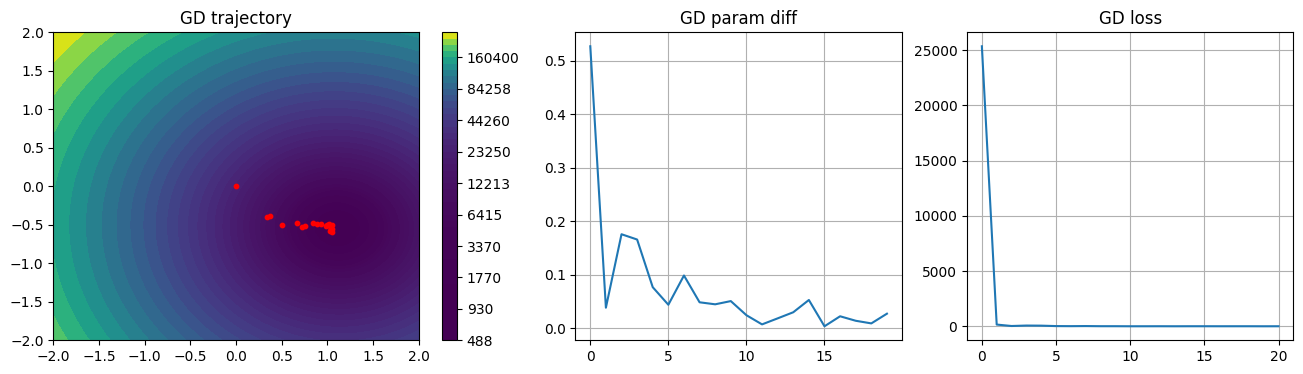

In [35]:
plt.figure(figsize=(16,4))


plt.subplot(1, 10, (1, 4))
plt.title('GD trajectory')

plt.contourf(*make_levels(np.linspace(-2, 2), lambda w: loss(w, X, y)))
plt.colorbar()

plt.scatter(w_hist[:,0], w_hist[:,1], c='r', s=10, zorder=10)


plt.subplot(1, 10, (5, 7))
plt.title('GD param diff')

diff = np.linalg.norm(w_hist[1:] - w_hist[:-1], axis=1)
plt.plot(np.arange(len(diff)), diff)

plt.grid()


plt.subplot(1, 10, (8, 10))
plt.title('GD loss')

plt.plot(np.arange(len(l_hist)), l_hist)

plt.grid()

plt.subplots_adjust(wspace=1)
plt.show()

In [36]:
l_hist

[25360.251852083376,
 157.879699805193,
 28.162952737596704,
 68.91349954743612,
 59.79020596716198,
 21.2983500376697,
 14.574609946917699,
 23.24058565571907,
 10.480566199565443,
 9.748117386133034,
 4.008618577897386,
 5.091100130244077,
 7.072916104871975,
 3.921149510510202,
 7.21440067304002,
 7.176205532252905,
 5.448158042238826,
 6.406594318463054,
 6.528494186370191,
 3.1789980342670754,
 6.066556847264421]